## Load data.

In [1]:
import numpy as np
import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt


CWD = os.path.abspath("")  # Jupyter notebook path.
dir_dict = os.path.join(CWD, "dicts")  # Data to plot.
dir_output = os.path.join(CWD, "output")  # Folder to put figures in.
dir_npy = os.path.join(CWD, "npy")  # Data files needed for plotting figures.

# Set up plotting parameters.
sent_colors = ["#504DB2", "#414042", "#B2504D"]  # POS, NEU, NEG
# costra_colors = ["#2CBEC6", "#F59448"]  # collaborators, non-collaborators
# misc_colors = ["#E6B32F", "#3F6F88"]
font_kw = {"family": "arial", "weight": "normal", "size": "7"}  # Markers and such.
mpl.rc("font", **font_kw)

# Load data to plot.
sent2lab = {1: "Favorable Sentiment", 0: "Neutral Sentiment", -1: "Critical Sentiment"}
sent2idx = {1: 0, 0: 1, -1: 2}

ratio_mat_rel = np.load(os.path.join(dir_npy, "ratio_mat_rel-hindex.npy"))
bins = np.load(os.path.join(dir_npy, "groups-hindex.npy"))

## Make figures.

In [2]:
def plot_hIndex(rmrs, dir_, ylims=None, sent=-1):

    fig, axes = plt.subplots(1, 2, figsize=(3.41 * 0.7, 3.41 * 0.7))
    for i_ax in range(2):  # Collaborators, and then Non-Collaborators
        ax = axes[i_ax]
        # xticklabels = [f"{int(bins[i]):d}-{int(bins[i+1]):d}" for i in range(len(bins) - 1)]
        xticklabels = [f"{int((bins[i]+bins[i+1])/2):d}" for i in range(len(bins) - 1)]

        kwargs = dict(
            widths=0.5,
            boxprops={"color": "black", "linewidth": 0.5},
            medianprops={"color": "black", "linewidth": 0.5},
            whiskerprops={"color": "black", "linewidth": 0.5, "visible": True},
            capprops={"color": "black", "linewidth": 0.5},
        )
        kwargs.update(dict(showmeans=False, showfliers=False, showbox=True, showcaps=True))
        ax.boxplot([rmrs[i_ax + 1, mi, sent2idx[sent], :] for mi in range(rmrs.shape[1])], **kwargs)

        xlim = ax.get_xlim()
        ylim = ylims[i_ax] if ylims is not None else ax.get_ylim()
        ax.set_xticks(range(1, len(xticklabels) + 1), xticklabels)
        ax.plot(xlim, [0, 0], color="grey", alpha=0.5, zorder=1, linestyle=":")  # Baseline (indistinguishable from null).
        if i_ax == 0:
            ax.set_ylabel(sent2lab[sent])
            ax.spines[["right", "top"]].set_visible(False)
        elif i_ax == 1:
            ax.get_yaxis().set_visible(False)
            ax.spines[["right", "top", "left"]].set_visible(False)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

    tmp_xmid = (fig.subplotpars.right + 0.09 + fig.subplotpars.left) / 2
    tmp_ymid = fig.subplotpars.bottom - 0.06
    fig.supxlabel(f"Difference in $h$-Index\n(Citing - Cited)", x=tmp_xmid, y=tmp_ymid)
    fig.tight_layout()
    plt.show()
    fig.savefig(os.path.join(dir_, f"hIndex {sent2lab[sent]}.svg"), bbox_inches="tight", transparent=True)
    fig.clf()  # Clear figure.
    plt.close(fig=fig)  # Close figure.

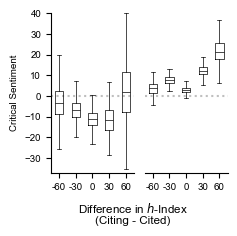

In [3]:
ylims = [[-37, 40], [-37, 40]]
# ylims = None
plot_hIndex(ratio_mat_rel, dir_output, ylims=ylims, sent=-1)  # Plot critical sentiment.

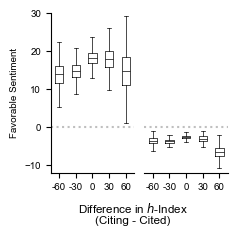

In [4]:
ylims = [[-12, 30], [-12, 30]]
# ylims = None
plot_hIndex(ratio_mat_rel, dir_output, ylims=ylims, sent=1)  # Plot favorable sentiment.